# <center> Assignment 4 task2 Unsupervised Learning 

In [109]:
import numpy as np
import os
import pandas as pd

from skimage import io
from keras.models import Sequential
from keras.layers import Flatten, Reshape, Dense, Activation, Conv2DTranspose,Conv2D, Dropout, LeakyReLU, MaxPooling2D, UpSampling2D
from keras import regularizers
from keras import Model
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# import data

In [69]:
#import training data from .\images

#40000 32 * 32 * 3 image + 40000 horizontal flip image
imgset = np.empty((80000, 32,32,3), dtype='float32')
gen = ImageDataGenerator()

for filename, i in zip(os.listdir('images'), range(40000)):
    imgset[2*i] =  io.imread(os.path.join(os.getcwd(), 'images', filename))#.flatten()
    imgset[2*i+1] = gen.apply_transform(imgset[2*i], {'flip_horizontal':True})
    
imgset = imgset/255

# preprocessing

In [3]:
#substract mean
def norm_2(data):
    mean = np.mean(data, axis = 1)
    
    return data, data - mean

#substract mean and divided by std
def norm_3(data):
    mean = np.mean(data, axis = 1)
    data = data - mean
    std = np.mean(data, axis = 1)
    
    return data, mean

#split data into training and testing set
def split_data(data):
    seed = 123456
    np.random.seed(seed)
    np.random.shuffle(data)
    
    train_set = data[:round(data.shape[0] * 0.9)]
    valid_set = data[round(data.shape[0] * 0.9):]
    
    return train_set, valid_set

# Model2 (CNN) CNN autoencoder

In [41]:
def cnn_autoencoder():
    model = Sequential()
    
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
    model.add(MaxPooling2D(2, 2))                              #16 * 6
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(2, 2))                              # 8 * 8 
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D(2, 2))    
    # 4 * 4
    model.add(Conv2D(16, (3, 3), padding='same', activation='relu')) # 4 * 4 * 16
    
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))    
    model.add(UpSampling2D((2, 2)))
    model.add(Conv2D(3, (3, 3), padding='same', activation='sigmoid'))
    #print(model.output_shape)
    #model.summary()
    return model

In [4]:
def dnn_autoencoder():
    model = Sequential()
    
    model.add(Flatten())
    model.add(Dense(units=4096, activation='relu', activity_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
    model.add(Dense(units=2048, activation='relu', activity_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
    model.add(Dense(units=1024, activation='relu', activity_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
    model.add(Dense(units=512, activation='relu', activity_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
    model.add(Dense(units=256, activation='relu', activity_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
    model.add(Dense(units=512, activation='relu', activity_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
    model.add(Dense(units=1024, activation='relu', activity_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
    model.add(Dense(units=2048, activation='relu', activity_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
    model.add(Dense(units=4096, activation='relu', activity_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
    model.add(Dense(units=1024, activation='relu', activity_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
    
    model.add(Reshape((4, 4, 64)))
    
    return model

# Training

In [70]:
cnn_code_model = cnn_autoencoder()
cnn_code_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = cnn_code_model.fit(imgset, imgset, epochs=100, batch_size=256)
cnn_code_model.summary()

Epoch 1/100
80000/80000 [==============================] - 16s 198us/step - loss: 0.5895 - accuracy: 0.0221
Epoch 2/100
80000/80000 [==============================] - 16s 197us/step - loss: 0.5646 - accuracy: 0.0229s - loss:
Epoch 3/100
80000/80000 [==============================] - 16s 198us/step - loss: 0.5602 - accuracy: 0.0229
Epoch 4/100
80000/80000 [==============================] - 16s 198us/step - loss: 0.5576 - accuracy: 0.0229
Epoch 5/100
80000/80000 [==============================] - 16s 198us/step - loss: 0.5562 - accuracy: 0.0229
Epoch 6/100
80000/80000 [==============================] - 16s 199us/step - loss: 0.5550 - accuracy: 0.0229
Epoch 7/100
80000/80000 [==============================] - 16s 199us/step - loss: 0.5541 - accuracy: 0.0229
Epoch 8/100
80000/80000 [==============================] - 16s 199us/step - loss: 0.5535 - accuracy: 0.0229
Epoch 9/100
80000/80000 [==============================] - 16s 199us/step - loss: 0.5527 - accuracy: 0.0229
Epoch 10/100
80000/

# reconstruction results

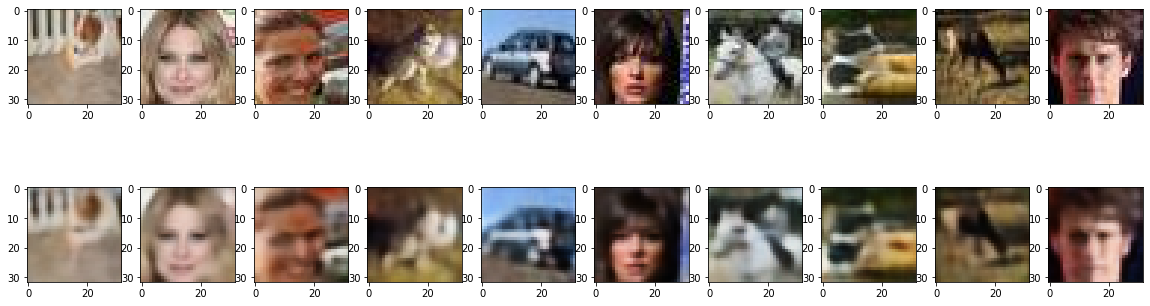

In [71]:
#look 10 images and their deconstruction
fig, axs = plt.subplots(2, 10, figsize=(20, 6))
selected = np.arange(0, 20, 2)
recon_img = cnn_code_model.predict(imgset[selected,:])

for i in range(10):
    axs[0][i].imshow(imgset[selected[i]] .reshape(32, 32, 3))
    axs[1][i].imshow(recon_img[i].reshape(32, 32, 3))

plt.show()

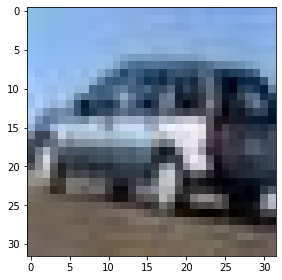

In [84]:
#test on the 7th image(a man's face) in imgset
manface = imgset[8]
io.imshow(manface.reshape(32, 32, 3))
plt.show()

# get intermediate output and little test

In [72]:
#reduce dimension of imgset by using already trained model
def dim_red_1(model, layer_index, data, query):
    encoder = Model(inputs=model.input, outputs=model.get_layer(index=layer_index).output)
    dim_red_manface = encoder.predict(np.array([query]))[0]
    dim_red_imgset = encoder.predict(data)    
    
    return dim_red_imgset, dim_red_manface

imgset_cnn_code, manface_cnn_code = dim_red_1(cnn_code_model, 6, imgset, manface)

In [99]:
#dnn autoencoder
dnn_code_model = dnn_autoencoder()
dnn_code_model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
history = dnn_code_model.fit(imgset_cnn_code, imgset_cnn_code, epochs=10, batch_size=256)
dnn_code_model.summary()

Epoch 1/10
40000/40000 [==============================] - 6s 148us/step - loss: 0.0793 - accuracy: 3.4844e-04
Epoch 2/10
40000/40000 [==============================] - 6s 139us/step - loss: 0.0506 - accuracy: 0.0000e+00
Epoch 3/10
40000/40000 [==============================] - 6s 141us/step - loss: 0.0506 - accuracy: 0.0000e+00
Epoch 4/10
40000/40000 [==============================] - 6s 142us/step - loss: 0.0506 - accuracy: 0.0000e+00
Epoch 5/10
40000/40000 [==============================] - 6s 138us/step - loss: 0.0506 - accuracy: 0.0000e+00
Epoch 6/10
40000/40000 [==============================] - 6s 140us/step - loss: 0.0506 - accuracy: 0.0000e+00
Epoch 7/10
40000/40000 [==============================] - 6s 144us/step - loss: 0.0506 - accuracy: 0.0000e+00
Epoch 8/10
40000/40000 [==============================] - 6s 138us/step - loss: 0.0506 - accuracy: 0.0000e+00
Epoch 9/10
40000/40000 [==============================] - 6s 142us/step - loss: 0.0506 - accuracy: 0.0000e+00
Epoch 10/1

In [ ]:
#reduce dimension of imgset by using already trained model
def dim_red_2(model, layer_index, data, query):
    encoder = Model(inputs=model.input, outputs=model.get_layer(index=layer_index).output)
    dim_red_manface = encoder.predict(np.array([query]))[0]
    dim_red_imgset = encoder.predict(data)    
    
    return dim_red_imgset, dim_red_manface

imgset_dnn_code, manface_dnn_code = dim_red_2(dnn_code_model, 5, imgset_cnn_code, manface_cnn_code)

# classify

In [47]:
#compare each two image, store their cosine similarity, order by ascent
def cos_sim(data, query):
    similar =  np.dot(data , query) / (np.linalg.norm(data, axis=1) * np.linalg.norm(query))
    sorted_similar = np.flip(np.argsort(similar))

    return sorted_similar

#compare each two image, store their euclidean distance, order by ascent
def euc_dis(data, query):
    similar = np.linalg.norm(data - query, axis=1)
    sorted_similar = np.argsort(similar)
    
    return sorted_similar

#cluster by using k_means
def k_means(data, k, max_iter=300):
    #random select k data points as centroids
    def get_random_centroids(k):
        initial_index = np.random.choice(data.shape[0], k)
        centroids = data[initial_index]  #shape, (k, 28 * 28 * 3)
          
        return centroids
    
    #check if we stop in here
    def stop_calculation(oldcentroids, centroids, iterations):
        if iterations > max_iter:
            return True
        return (oldcentroids == centroids).all()
    
    #compute euclidean distance of each data point and each centroids
    #make the label with least euclidean distance
    def get_labels(data, centroids):
        result = np.empty((k, data.shape[0]), dtype='float32')
        for i in range(k):
            result[i] = np.linalg.norm(data - centroids[i], axis=1)
            
        result = np.argmin(result.T, axis=1)    
               
        return result
    
    #compute the new centroids of each label
    #which is the average of data points
    def get_centroids(data, labels, centroids):
        for i in range(k):
            centroids[i] = np.sum(data[np.argwhere(labels == i).flatten(),:], axis=0) / \
                            np.argwhere(labels == i).flatten().shape[0]
        
        return centroids
        
    #k == len(centroids)
    centroids = get_random_centroids(k)
    oldcentroids = None
    iterations = 0
    
    while not stop_calculation(oldcentroids, centroids, iterations):
        iterations += 1
        #print(iterations)
        oldcentroids = np.copy(centroids)
        labels = get_labels(data, centroids)
        centroids = get_centroids(data, labels, centroids)
        
    return centroids   

# raw data

In [73]:
#test on raw data
#0.5 accuracy
similar = euc_dis(imgset_cnn_code, 18)
similar.shape

(80000, 4, 16)

# clustering

In [115]:
#use PCA reduce dimension again
pca = PCA(n_components=32, copy=False, whiten=True, svd_solver='full')
data_pca_reduce = pca.fit_transform(imgset_cnn_code.reshape(80000, 4*4*16))

In [124]:
#test on cnn autoencoder
labels = KMeans(n_clusters=3, random_state=1).fit(data_pca_reduce).labels_

In [125]:
similar = np.argwhere(labels == labels[8]).flatten()
similar.shape

(41080,)

# show 400 nearest img

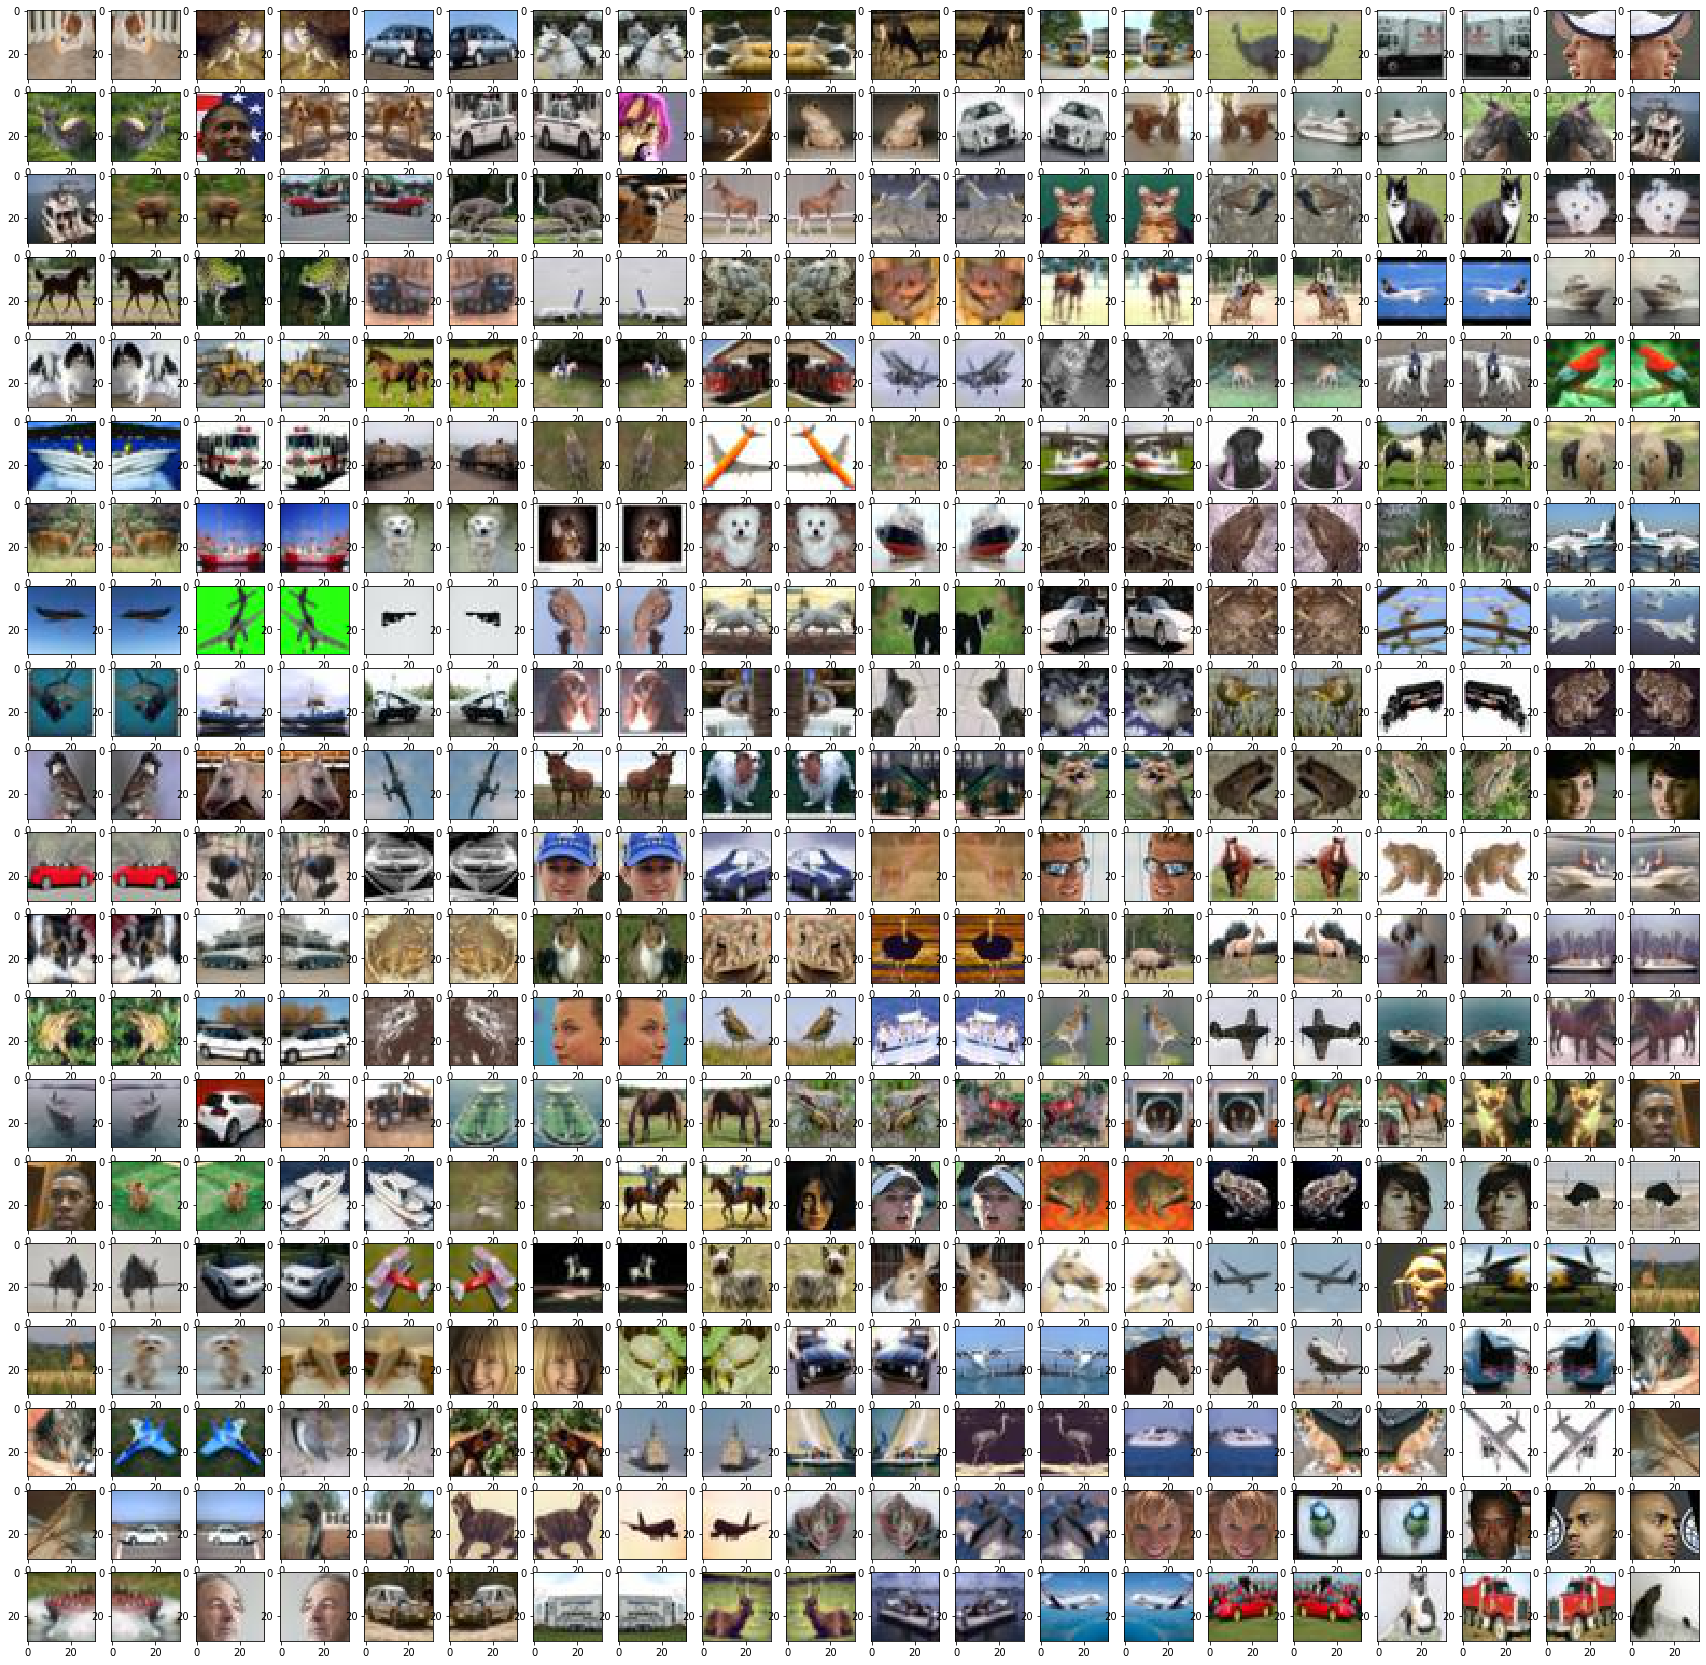

In [121]:
#have a loot to these image
fig, axs = plt.subplots(20, 20, figsize=(30, 30))
for i in range(20):
    for j in range(20):
        axs[i][j].imshow(imgset[similar[i*20+j]])
        #if i*20+j >= len(similar):
        #    break
        #axs[i][j].imshow(imgset[[similar[i*20+j]]].reshape(32, 32, 3))
        
plt.show()

# predict

In [122]:
#import test_case.csv
x_test = np.loadtxt('test_case.csv', delimiter=',', dtype='int32' , skiprows=1, usecols=(1,2))

In [126]:
#create result array
y_test = (labels[ 2*(x_test[:,0] - 1) ] == labels[2*(x_test[:,1] - 1)])
pd_output = pd.DataFrame(data={'id': np.arange(1000000), 'label': y_test}, dtype='int32')
pd_output.to_csv('results.csv', index=False)